In [6]:
#import warnings
import sys 

import pickle

sys.path.insert(0,'/zhome/94/5/127021/speciale/master_project')
from src.visualization.tcav_visual import plot_results

In [7]:
PATH = '/work3/s174498/nlp_tcav_results/'

with open(PATH+'negative_news_layer_0_11.pkl','rb') as handle:
    data = pickle.load(handle)


/work3/s174498/nlp_tcav_results/figures/news_concepts/
concept news
concept world
concept sport
concept business
concept science
Now overwritting and saving figure


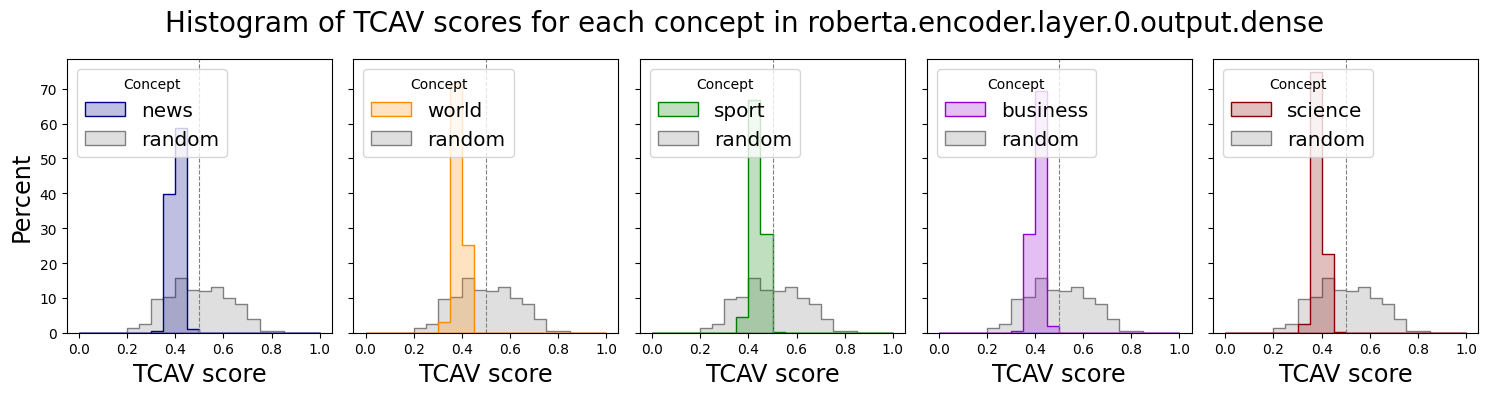

Now overwritting and saving figure


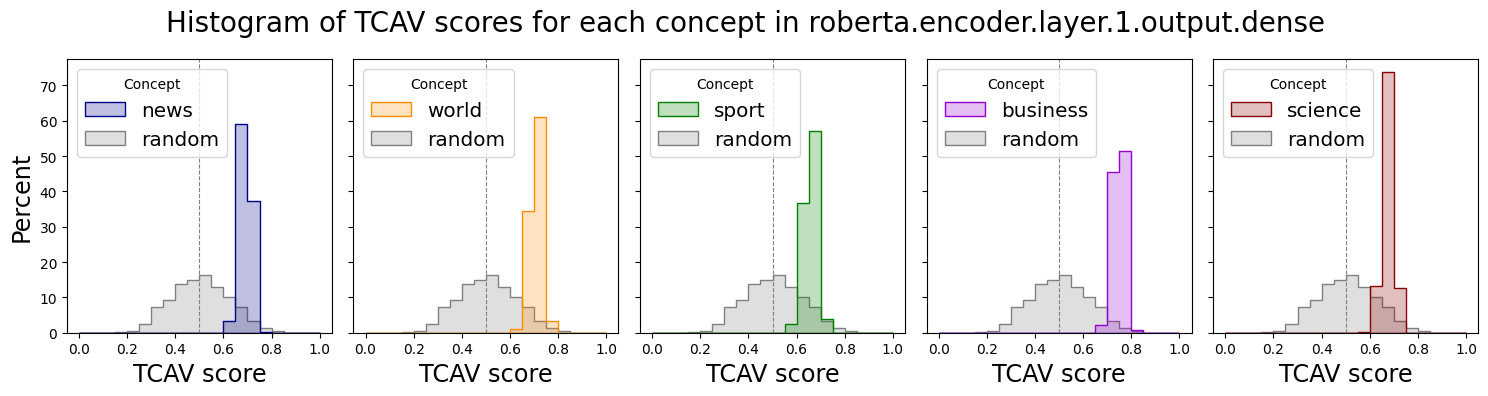

Now overwritting and saving figure


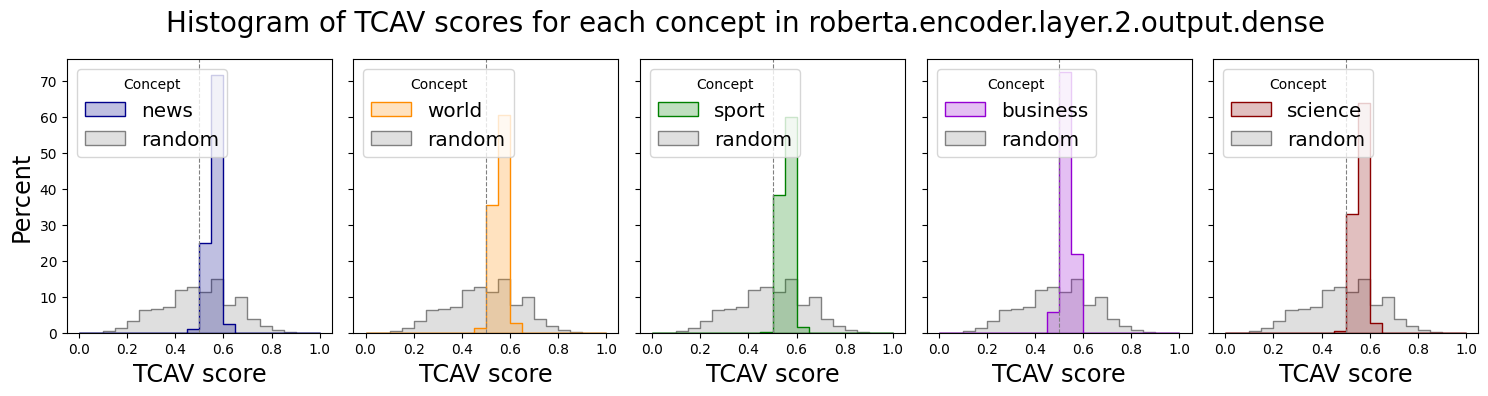

Now overwritting and saving figure


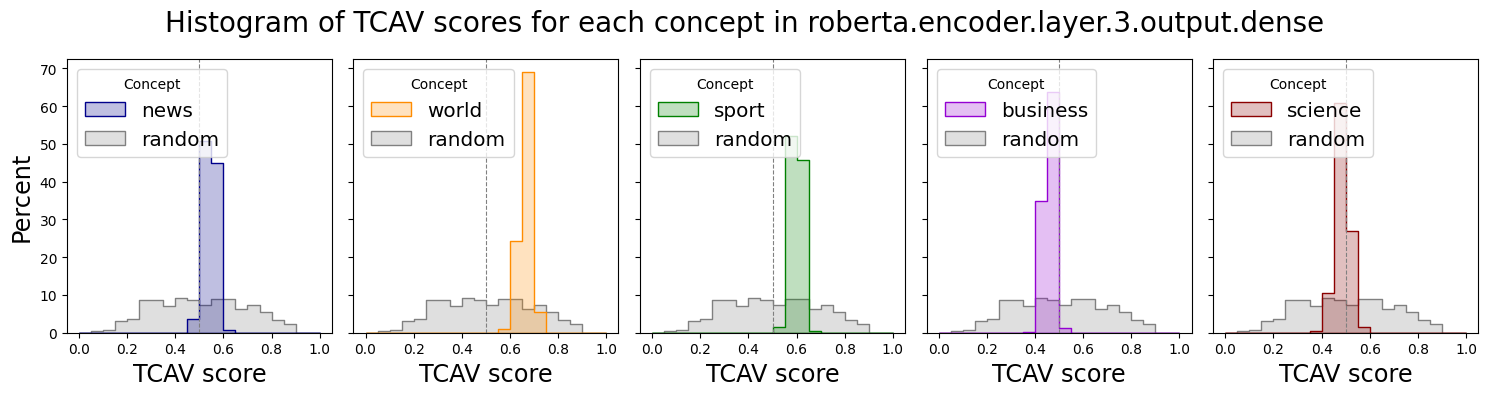

Now overwritting and saving figure


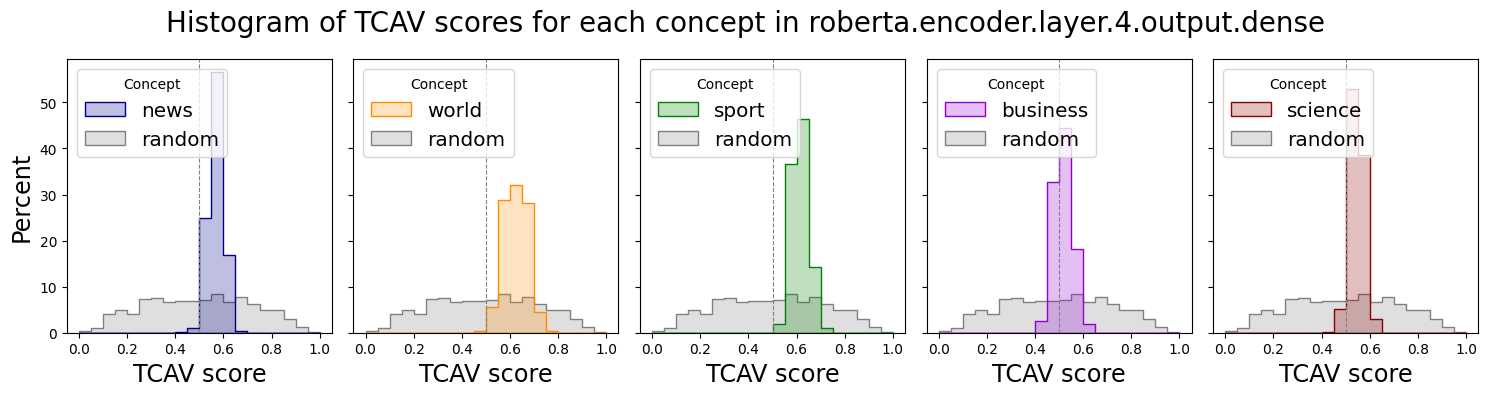

Now overwritting and saving figure


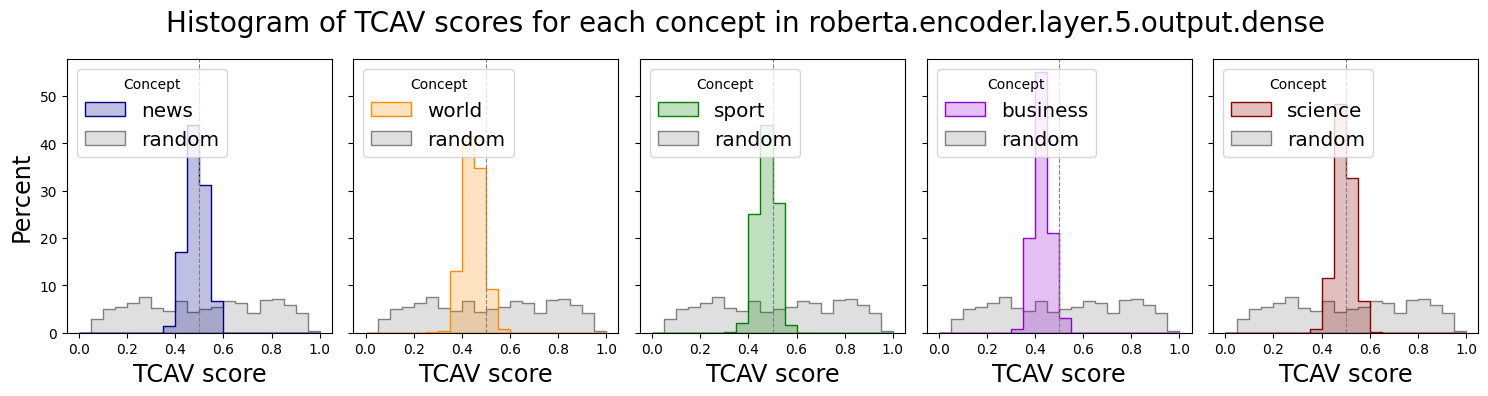

Now overwritting and saving figure


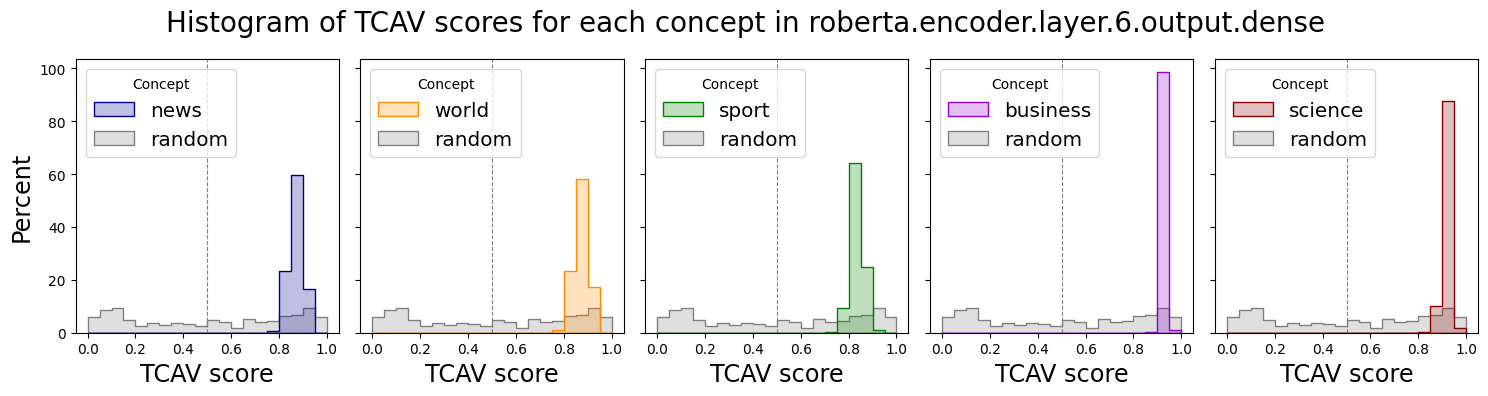

Now overwritting and saving figure


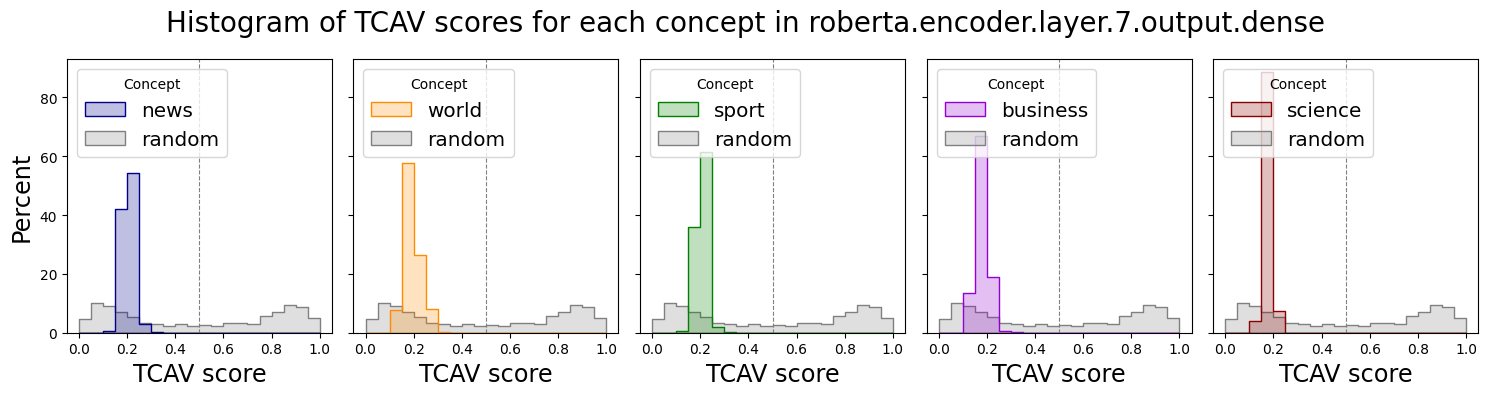

Now overwritting and saving figure


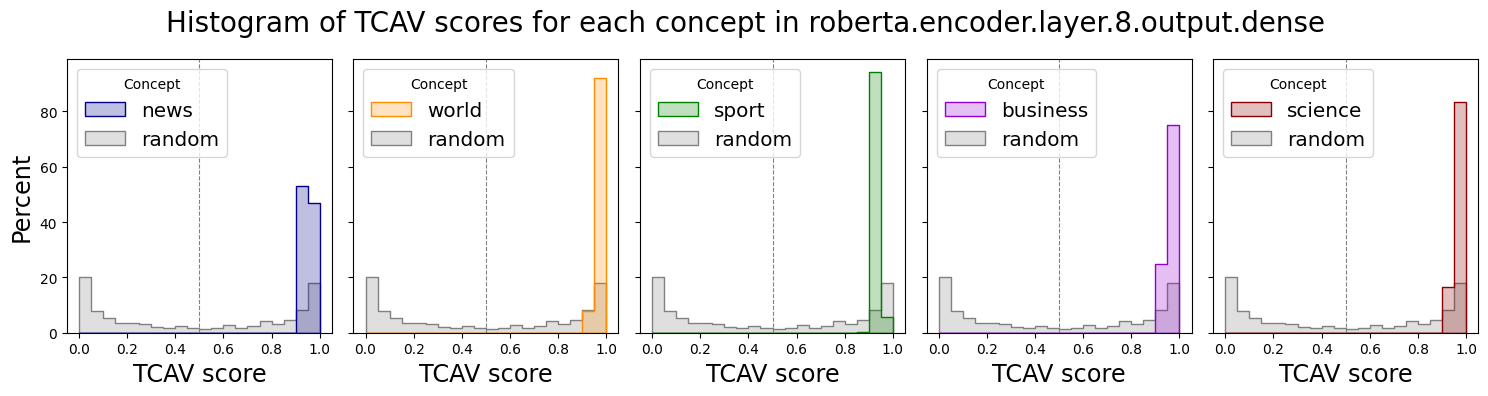

Now overwritting and saving figure


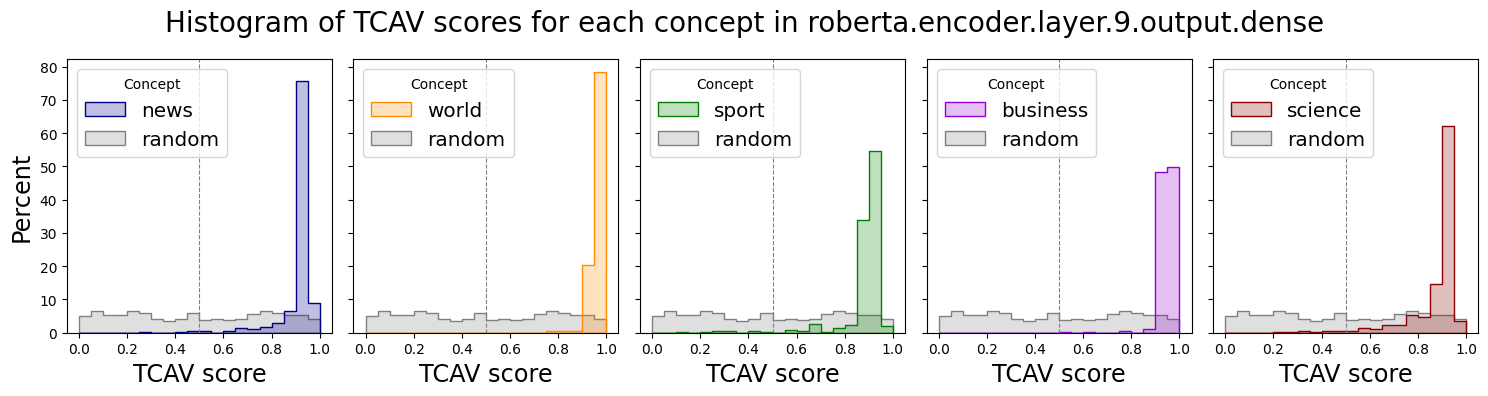

Now overwritting and saving figure


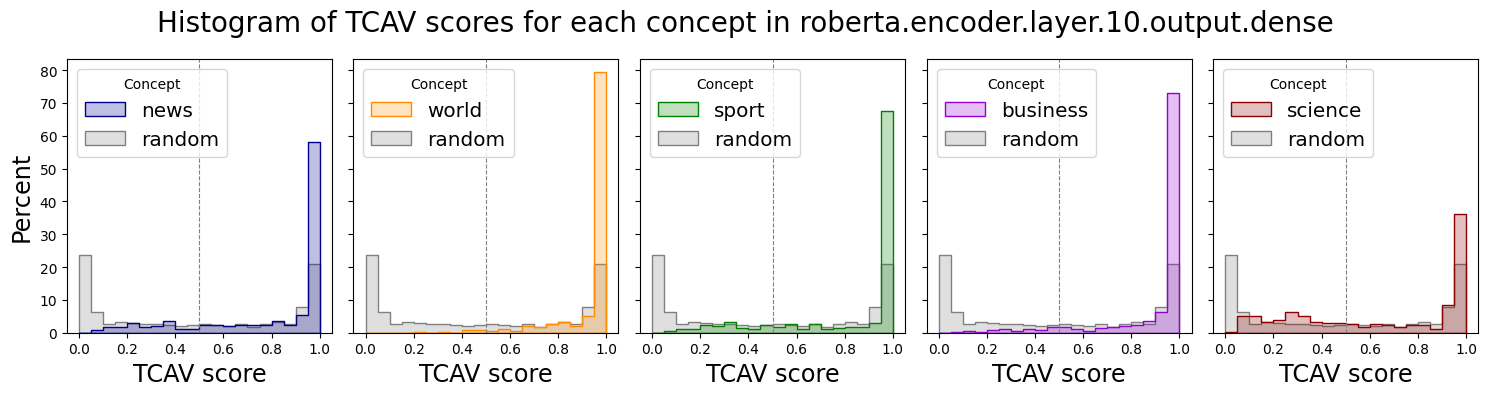

Now overwritting and saving figure


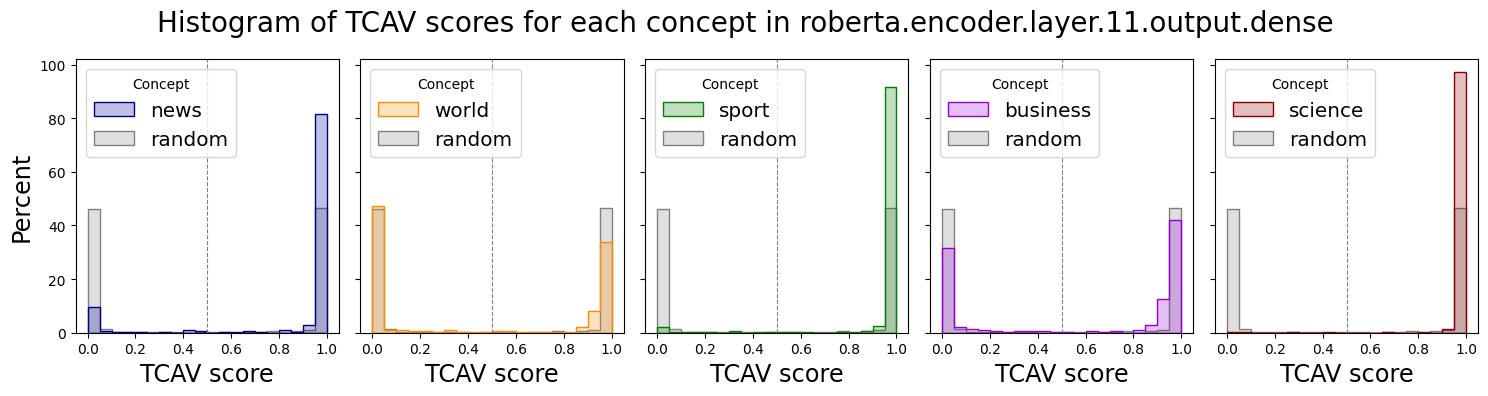

{'random_p-value': [0.5015, 0.487864137508248], 'bn_vals': [0.8722266666666667, 0.01, 0.9575733333333333, 0.5991866666666666, 0.9890533333333333], 'bn_stds': [0.3116958948148731, 0, 0.1749842537677795, 0.45598660389679574, 0.08754245598565305], 'significant': [True, False, True, True, True], 'p-value': [2.3269066066922473e-42, 0.21720061366385104, 5.729384429716515e-73, 0.0011210149483548736, 1.3505056652205015e-87], 'concept': ['news', 'world', 'sport', 'business', 'science']}
num concepts 5
bn roberta.encoder.layer.0.output.dense
bn roberta.encoder.layer.1.output.dense
bn roberta.encoder.layer.2.output.dense
bn roberta.encoder.layer.3.output.dense
bn roberta.encoder.layer.4.output.dense
bn roberta.encoder.layer.5.output.dense
bn roberta.encoder.layer.6.output.dense
bn roberta.encoder.layer.7.output.dense
bn roberta.encoder.layer.8.output.dense
bn roberta.encoder.layer.9.output.dense
bn roberta.encoder.layer.10.output.dense
bn roberta.encoder.layer.11.output.dense
Now overwritting and

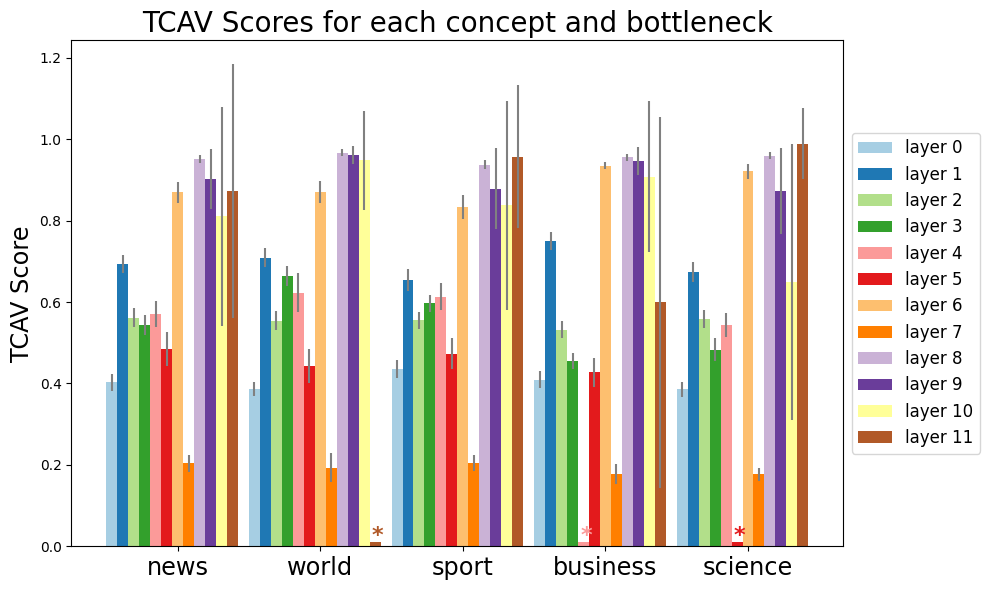

In [9]:
# comcepts 
# ['hate','irony','offensive'] 
# ['intersex','man','transsexual','woman']
concepts = ['news','world','sport','business','science']
PATH =  '/work3/s174498/nlp_tcav_results/figures/news_concepts/'
output = plot_results(data, 'negative', concepts ,PATH, plot_hist = True, save_fig =True, t_test_mean = None)